In [ ]:
# Installing ydata-profiling
!pip install --upgrade numba ydata-profiling visions

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=026305ab9a5285ff45bcfbb1db353d78d82c19969ce0684fdadfc619fea232c6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [104]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

In [105]:
# Loading cleaned dataset
df = pd.read_pickle('cleaned_arrears_data.pkl')

In [106]:
# Displaying df
df.head()

,Customer_ID,Contract_Term,Cost_Amount_GBP,Regulatory_Compliance,Customer_Category,Exposure_Amount_GBP,Contract_Status,Assistance_Flag,Risk_Flag,Payment_Status,Forbearance_Amount_GBP,Payment_Interval,Late_Payment_Fees_GBP,Total_Arrears_GBP
0,FGM266208,24,5996.88,Yes,LLC,2804.97,Active,Yes,No,Recovered,1856.69,Monthly,990.39,18184.46
1,SMG503835,16,33732.95,No,Sole Proprietorship,13383.33,Closed,Yes,No,Recovered,4158.84,Annually,846.10,14285.45
2,LLO450747,12,28786.90,No,Sole Proprietorship,20726.77,Expired,Yes,No,Recovered,3121.22,Monthly,317.81,5901.28
3,ZZQ704582,16,46503.75,No,Sole Proprietorship,14817.61,Closed,No,No,Recovered,3488.97,Annually,578.36,16131.06
4,ZIS532090,30,32622.67,Yes,Corporation,14472.43,Active,Yes,No,Delinquent,3463.74,Quarterly,278.26,12982.46


In [107]:
# Ensuring the data is clean before proceeding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Customer_ID             100000 non-null  object  
 1   Contract_Term           100000 non-null  int64   
 2   Cost_Amount_GBP         100000 non-null  float64 
 3   Regulatory_Compliance   100000 non-null  category
 4   Customer_Category       100000 non-null  category
 5   Exposure_Amount_GBP     100000 non-null  float64 
 6   Contract_Status         100000 non-null  category
 7   Assistance_Flag         100000 non-null  category
 8   Risk_Flag               100000 non-null  category
 9   Payment_Status          100000 non-null  category
 10  Forbearance_Amount_GBP  100000 non-null  float64 
 11  Payment_Interval        100000 non-null  category
 12  Late_Payment_Fees_GBP   100000 non-null  float64 
 13  Total_Arrears_GBP       100000 non-null  float64 
dtypes: ca

In [108]:
# Summary statistics for numerical columns
print("Summary statistics for df_1:")
df.describe()

Summary statistics for df_1:


,Contract_Term,Cost_Amount_GBP,Exposure_Amount_GBP,Forbearance_Amount_GBP,Late_Payment_Fees_GBP,Total_Arrears_GBP
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,36.006750,27485.687990,15273.018362,2493.900181,499.586019,10000.95278
std,14.147122,12984.377137,8541.766314,1442.396566,288.796795,5764.36867
min,12.000000,5000.680000,500.440000,0.140000,0.010000,0.00000
25%,24.000000,16241.305000,7866.002500,1241.722500,248.997500,5017.05000
50%,36.000000,27431.955000,15318.405000,2495.990000,500.285000,10011.58000
75%,48.000000,38753.662500,22693.082500,3741.670000,749.372500,14995.64000
max,60.000000,49999.900000,29999.930000,4999.980000,999.990000,19999.82000


In [109]:
# Descriptive statistics for categorical variables
print("Descriptive statistics for df_1:")
df.describe(include=['category'])

Descriptive statistics for df_1:


,Regulatory_Compliance,Customer_Category,Contract_Status,Assistance_Flag,Risk_Flag,Payment_Status,Payment_Interval
count,100000,100000,100000,100000,100000,100000,100000
unique,2,5,3,2,2,3,3
top,Yes,Sole Proprietorship,Expired,No,No,Current,Monthly
freq,50032,20189,33348,50190,50257,33497,33401


In [110]:
# Exploratory data analysis
eda = ProfileReport(df , dark_mode= True , title = 'EDA REPORT ')
eda

Output hidden; open in https://colab.research.google.com to view.

<Figure size 900x700 with 0 Axes>

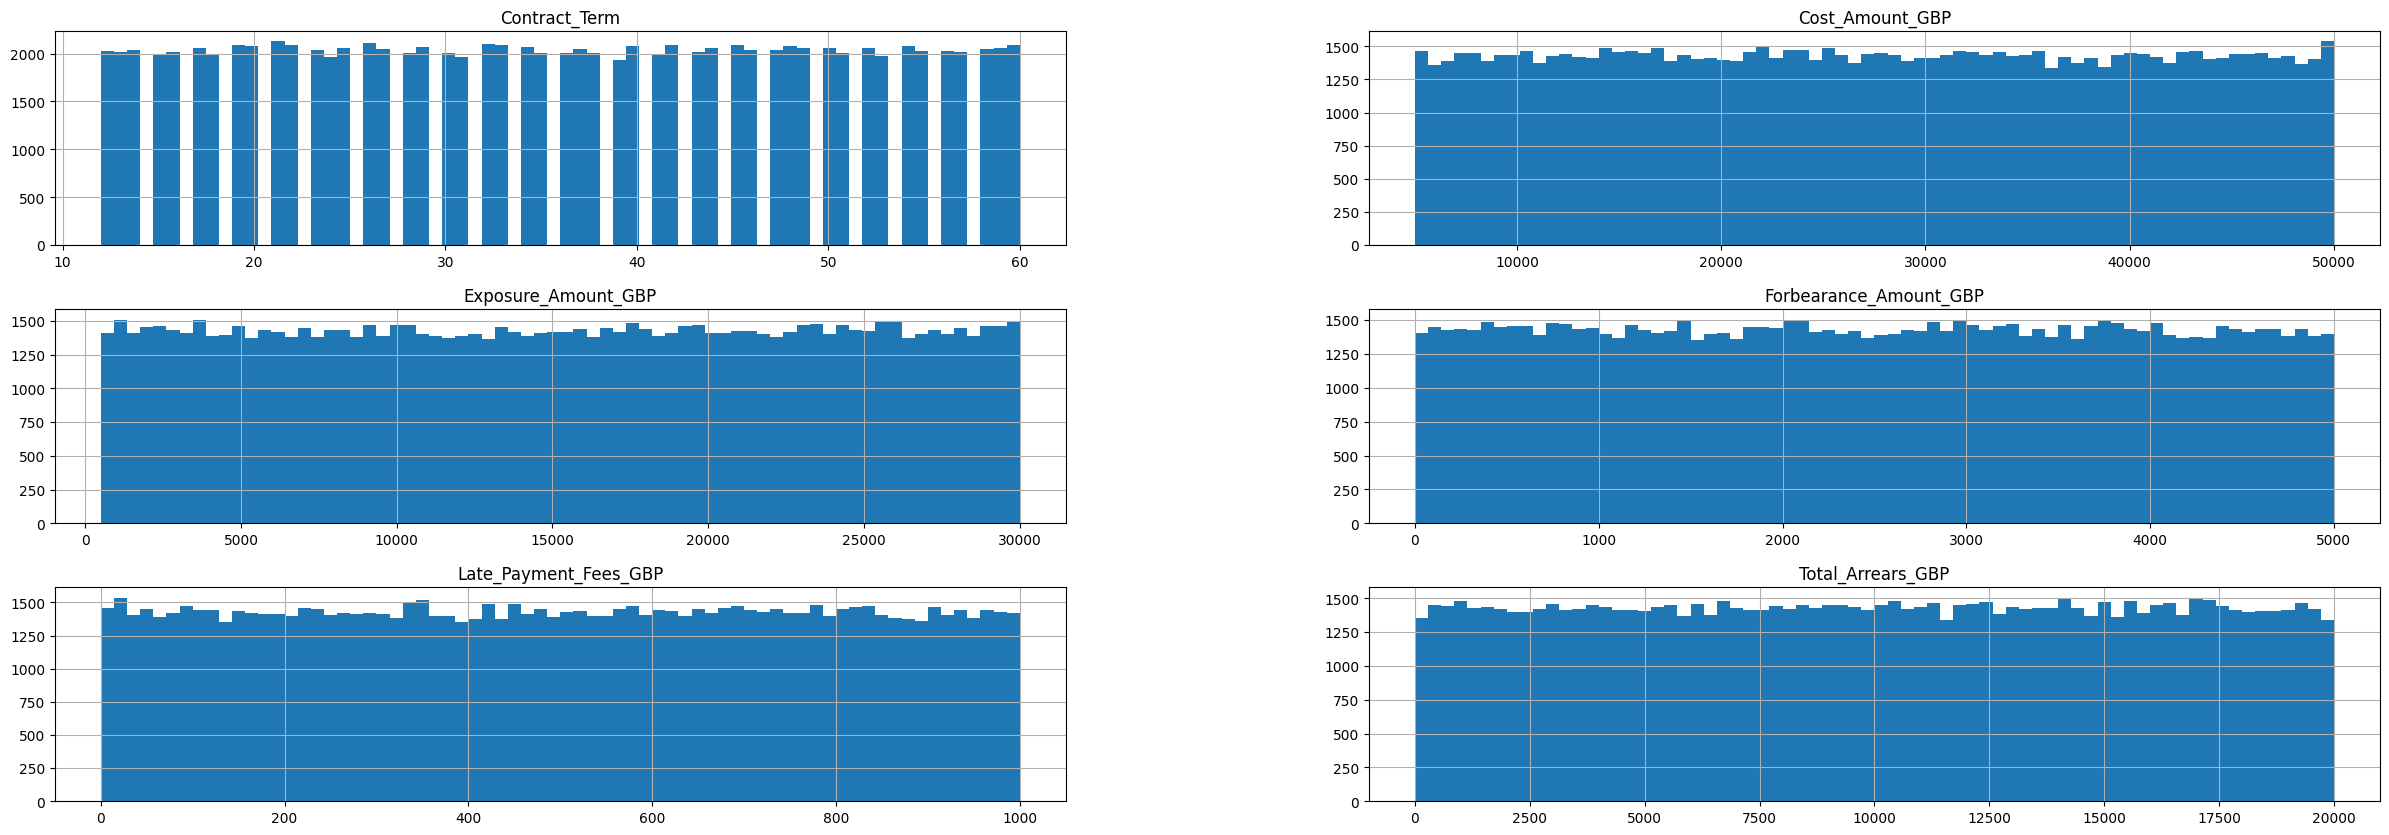

In [112]:
# Showing distribution of numerical features
plt.figure(figsize=(9, 7))

df.hist(bins=70, figsize=(30, 10))
plt.show()

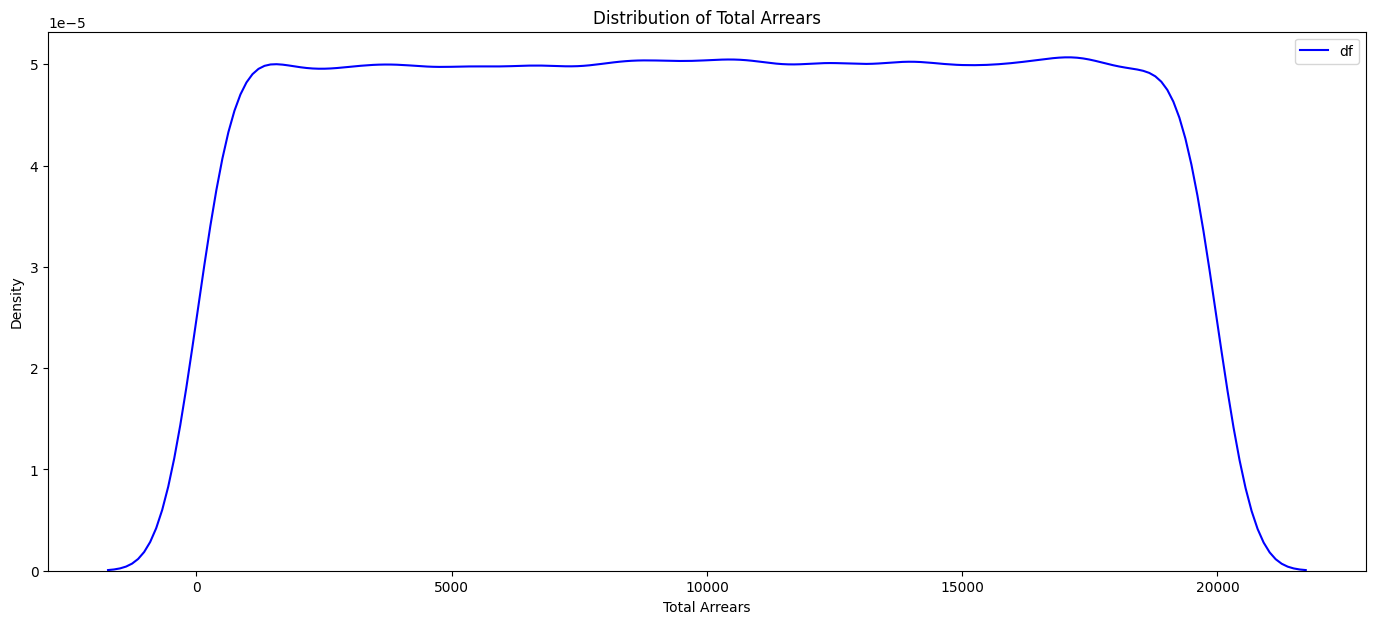

In [113]:
# Showing distribution of Total Arrears
plt.figure(figsize=(17, 7))

sns.kdeplot(df['Total_Arrears_GBP'], label='df', color='blue')
# sns.kdeplot(df_2['Forbearance_Amount_GBP'], label='df_2', color='orange')
plt.title('Distribution of Total Arrears')
plt.xlabel('Total Arrears')
plt.ylabel('Density')
plt.legend()
plt.show()

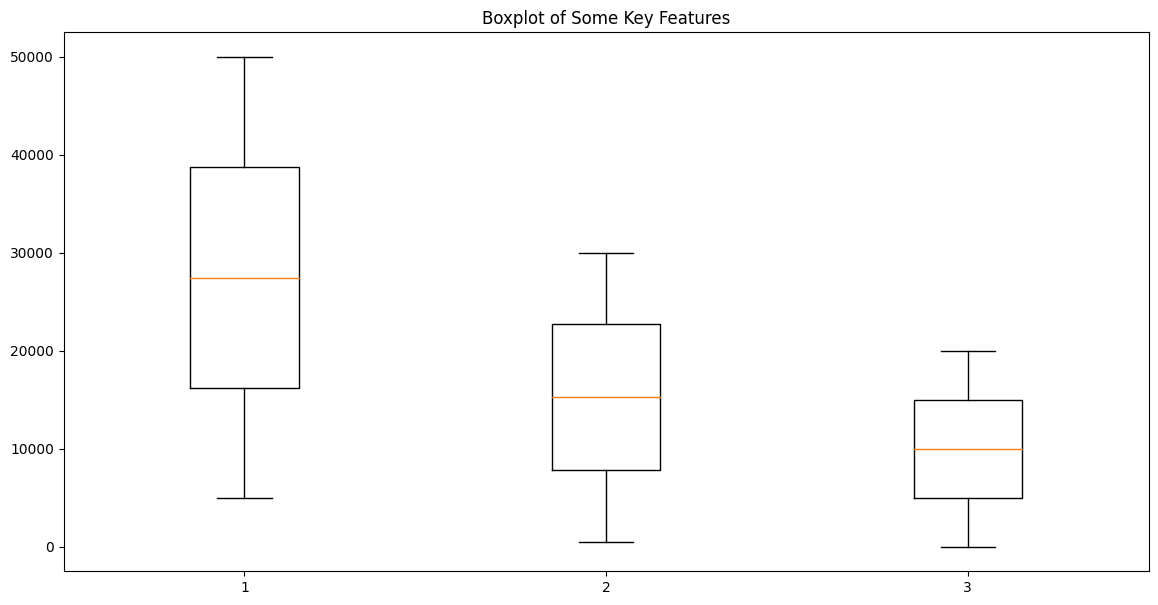

In [114]:
# Visualizing boxplots for outliers & for spread of data
plt.figure(figsize=(14, 7))

plt.boxplot(df[['Cost_Amount_GBP', 'Exposure_Amount_GBP', 'Total_Arrears_GBP']])
plt.title('Boxplot of Some Key Features')
plt.show()

In [115]:
# Dropping columns not useful for modelling
droppers = ['Customer_ID', 'Regulatory_Compliance', 'Contract_Status', 'Risk_Flag', 'Payment_Status', 'Forbearance_Amount_GBP', 'Late_Payment_Fees_GBP']
df.drop(droppers, axis = 1 , inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Contract_Term        100000 non-null  int64   
 1   Cost_Amount_GBP      100000 non-null  float64 
 2   Customer_Category    100000 non-null  category
 3   Exposure_Amount_GBP  100000 non-null  float64 
 4   Assistance_Flag      100000 non-null  category
 5   Payment_Interval     100000 non-null  category
 6   Total_Arrears_GBP    100000 non-null  float64 
dtypes: category(3), float64(3), int64(1)
memory usage: 3.3 MB


In [118]:
# Feature engineering
# Debt-to-Exposure Ratio: Calculate the ratio of Total Arrears to Exposure Amount. This will help understand how much arrears a customer has relative to their overall exposure.
# Arrears as Percentage of Asset Cost: You can create a feature that calculates arrears as a percentage of the asset's original cost. This will help models understand how significant the arrears are.

df['Debt_to_Exposure_Ratio'] = df['Total_Arrears_GBP'] / df['Exposure_Amount_GBP']
# df['Arrears_to_Asset_Cost'] = df['Total_Arrears_GBP'] / df['Cost_Amount_GBP']
df['Arrears_to_Asset_Cost'] = (df['Total_Arrears_GBP'] / df['Cost_Amount_GBP']) * 100

# Adding column to indicate if the customer is in arrears based on Total Arrears
df['In_Arrears_Flag'] = df['Total_Arrears_GBP'].apply(lambda x: 1 if x > 0 else 0)


df.head()

,Contract_Term,Cost_Amount_GBP,Customer_Category,Exposure_Amount_GBP,Assistance_Flag,Payment_Interval,Total_Arrears_GBP,Debt_to_Exposure_Ratio,Arrears_to_Asset_Cost,In_Arrears_Flag
0,24,5996.88,LLC,2804.97,Yes,Monthly,18184.46,6.482943,303.232014,1
1,16,33732.95,Sole Proprietorship,13383.33,Yes,Annually,14285.45,1.067406,42.348653,1
2,12,28786.90,Sole Proprietorship,20726.77,Yes,Monthly,5901.28,0.284718,20.499880,1
3,16,46503.75,Sole Proprietorship,14817.61,No,Annually,16131.06,1.088641,34.687654,1
4,30,32622.67,Corporation,14472.43,Yes,Quarterly,12982.46,0.897048,39.795823,1


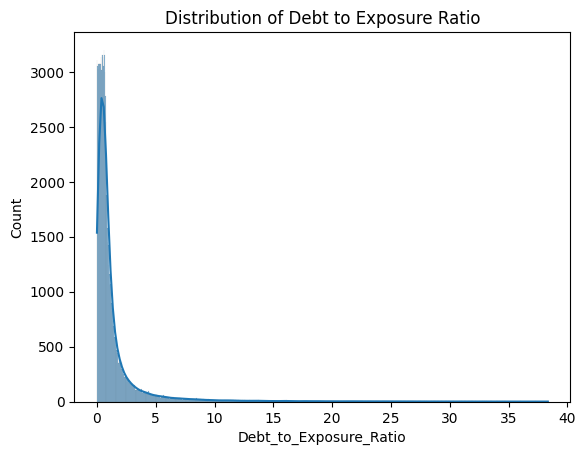

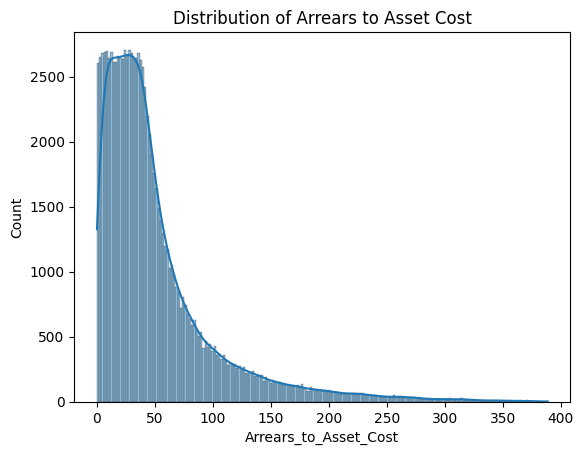

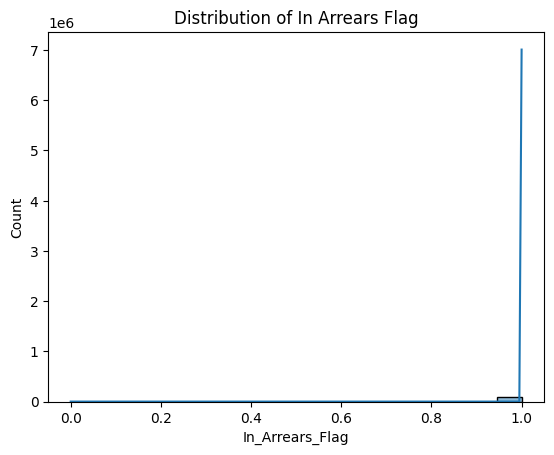

In [119]:
# Visualizing new features
sns.histplot(df['Debt_to_Exposure_Ratio'], kde=True)
plt.title('Distribution of Debt to Exposure Ratio')
plt.show()

sns.histplot(df['Arrears_to_Asset_Cost'], kde=True)
plt.title('Distribution of Arrears to Asset Cost')
plt.show()

sns.histplot(df['In_Arrears_Flag'], kde=True)
plt.title('Distribution of In Arrears Flag')
plt.show()

In [120]:
# Visualizing outliers for old and new features
col = ['Cost_Amount_GBP', 'Total_Arrears_GBP']
for i in col:
    fig = px.box(df , y = i , title  = f'BOX PLOT FOR {i}')
    fig.show()

hol = ['Debt_to_Exposure_Ratio' ,'Arrears_to_Asset_Cost']
for i in hol:
    fig = px.box(df , y=i)
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [121]:
# Applying label encoding to binary column

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Binary column
binary_column = ['Assistance_Flag']

# Applying LabelEncoder to binary column
for col in binary_column:
    df[col] = label_encoder.fit_transform(df[col])

In [122]:
# One-hot encoding categorical columns
categorical_columns = ['Customer_Category', 'Payment_Interval']

# Applying one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True).astype(float)  # drop_first=True avoids multicollinearity

In [123]:
# Displaying and checking df
df

,Contract_Term,Cost_Amount_GBP,Exposure_Amount_GBP,Assistance_Flag,Total_Arrears_GBP,Debt_to_Exposure_Ratio,Arrears_to_Asset_Cost,In_Arrears_Flag,Customer_Category_Individual,Customer_Category_LLC,Customer_Category_Small Business,Customer_Category_Sole Proprietorship,Payment_Interval_Monthly,Payment_Interval_Quarterly
0,24.0,5996.88,2804.97,1.0,18184.46,6.482943,303.232014,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,16.0,33732.95,13383.33,1.0,14285.45,1.067406,42.348653,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.0,28786.90,20726.77,1.0,5901.28,0.284718,20.499880,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,16.0,46503.75,14817.61,0.0,16131.06,1.088641,34.687654,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,30.0,32622.67,14472.43,1.0,12982.46,0.897048,39.795823,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12.0,23149.45,9908.06,1.0,19202.36,1.938054,82.949530,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99996,52.0,42607.03,3340.02,0.0,14225.31,4.259049,33.387237,1.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,33.0,26121.74,12521.39,0.0,17703.17,1.413834,67.771787,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,26.0,5760.01,21233.17,1.0,4900.34,0.230787,85.075200,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [124]:
# Displaying df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Contract_Term                          100000 non-null  float64
 1   Cost_Amount_GBP                        100000 non-null  float64
 2   Exposure_Amount_GBP                    100000 non-null  float64
 3   Assistance_Flag                        100000 non-null  float64
 4   Total_Arrears_GBP                      100000 non-null  float64
 5   Debt_to_Exposure_Ratio                 100000 non-null  float64
 6   Arrears_to_Asset_Cost                  100000 non-null  float64
 7   In_Arrears_Flag                        100000 non-null  float64
 8   Customer_Category_Individual           100000 non-null  float64
 9   Customer_Category_LLC                  100000 non-null  float64
 10  Customer_Category_Small Business       100000 non-null  f

In [125]:
# Scaling numerical features using MinMax Scaler

# Numerical columns to scale
numerical_columns = ['Contract_Term', 'Cost_Amount_GBP', 'Exposure_Amount_GBP',
                     'Total_Arrears_GBP', 'Debt_to_Exposure_Ratio', 'Arrears_to_Asset_Cost']

# Initializing scaler
scaler = MinMaxScaler()

# Fitting and transforming numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Checking scaled data
df.head()

,Contract_Term,Cost_Amount_GBP,Exposure_Amount_GBP,Assistance_Flag,Total_Arrears_GBP,Debt_to_Exposure_Ratio,Arrears_to_Asset_Cost,In_Arrears_Flag,Customer_Category_Individual,Customer_Category_LLC,Customer_Category_Small Business,Customer_Category_Sole Proprietorship,Payment_Interval_Monthly,Payment_Interval_Quarterly
0,0.250000,0.022138,0.078121,1.0,0.909231,0.169107,0.779620,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.083333,0.638506,0.436716,1.0,0.714279,0.027843,0.108880,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.528592,0.685650,1.0,0.295067,0.007427,0.052706,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.083333,0.922306,0.485336,0.0,0.806560,0.028397,0.089183,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.375000,0.613833,0.473635,1.0,0.649129,0.023399,0.102316,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [126]:
# Displaying df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Contract_Term                          100000 non-null  float64
 1   Cost_Amount_GBP                        100000 non-null  float64
 2   Exposure_Amount_GBP                    100000 non-null  float64
 3   Assistance_Flag                        100000 non-null  float64
 4   Total_Arrears_GBP                      100000 non-null  float64
 5   Debt_to_Exposure_Ratio                 100000 non-null  float64
 6   Arrears_to_Asset_Cost                  100000 non-null  float64
 7   In_Arrears_Flag                        100000 non-null  float64
 8   Customer_Category_Individual           100000 non-null  float64
 9   Customer_Category_LLC                  100000 non-null  float64
 10  Customer_Category_Small Business       100000 non-null  f

In [127]:
# Displaying sum of null values as part of final checks
df.isnull().sum()

,0
Contract_Term,0
Cost_Amount_GBP,0
Exposure_Amount_GBP,0
Assistance_Flag,0
Total_Arrears_GBP,0
Debt_to_Exposure_Ratio,0
Arrears_to_Asset_Cost,0
In_Arrears_Flag,0
Customer_Category_Individual,0
Customer_Category_LLC,0


In [128]:
# Displaying sum of duplicated values as part of final checks
df.duplicated().sum()

0

In [129]:
# Defining target and features
X = df.drop('In_Arrears_Flag', axis=1)  # Features
y = df['In_Arrears_Flag']  # Target variable

In [ ]:
# Linear Regression, Neural Networks: Preprocessing with Scaling and One-Hot Encoding
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['Contract_Term', 'Cost_Amount_GBP', 'Exposure_Amount_GBP',
#                                    'Forbearance_Amount_GBP', 'Late_Payment_Fees_GBP']),
#         ('cat', OneHotEncoder(), ['Regulatory_Compliance', 'Customer_Category',
#                                   'Contract_Status', 'Assistance_Flag',
#                                   'Risk_Flag', 'Payment_Status', 'Payment_Interval'])
#     ])

In [131]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing shapes of training and testing sets for verification
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (80000, 13)
Testing set shape: (20000, 13)


In [132]:
# Saving splits for models
with open('train_test_splits.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)